## Nicolas Leguizamón, código: 201727960
## Leidy Araque Molina, código: 201727196

# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

## **<font color=blue>Desarrollo</font>**

Primero se buscan los decimales de pi:

```
pi = 3.141592653589793
```
Luego se crea la siguiente función:

In [15]:
from math import pi
def mult_dec_pi(a, b):  
        decimal_of_pi = [".",1,4,1,5,9,2,6,5,3,5,8,9,7,9,3]
        if a >= 16 or b >= 16 or a <= 0 or b <= 0:
            print("'Error'")            
        else: 
            g = decimal_of_pi[b]
            f = decimal_of_pi[a]
               
            result = f * g
            return result

A continuación, se prueba la función, y se verifica que el resultado sea el esperado:

In [16]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [17]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [18]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [19]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [20]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error'


# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

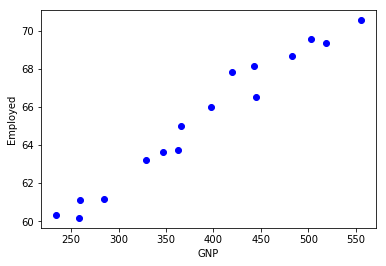

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

## **<font color=blue>Desarrollo</font>**

In [31]:
import numpy as np
import pandas as pd
y = data[:, 1]
X = data[:, 2]
datos = pd.DataFrame({'GNP':X, 'Employed':y})

A continuación, se crea el modelo:

In [32]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
y = datos['Employed']
X = datos['GNP']

In [33]:
linreg.fit(X.values.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Se realiza la predicción:

In [34]:
y_pred= linreg.predict(X.values.reshape(-1,1))

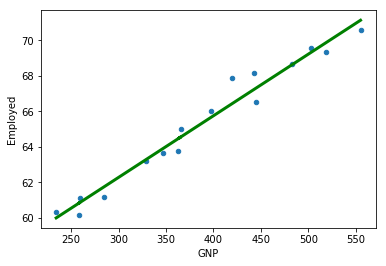

In [36]:
datos.plot('GNP', 'Employed', kind='scatter')
plt.plot(X.values.reshape(-1,1), y_pred, color='green', linewidth=3)

# Exercise 01.3

Analyze the baby names dataset using pandas

In [37]:
import pandas as pd
import zipfile
with zipfile.ZipFile('C:/AppliedDeepLearningClass-master/datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [38]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [39]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [40]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

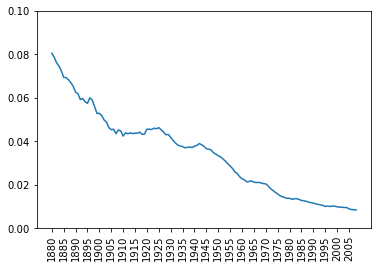

In [41]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

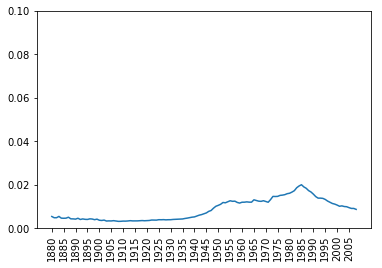

In [42]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

## **<font color=blue>Desarrollo</font>**

Para identificar los nombres más populares en cada una de las décadas, se crea la siguiente función:

In [43]:
def names_decade(AñoInicial, AñoFinal):   
    b = boys[boys.year >= AñoInicial]
    b2 = b[boys.year <= AñoFinal]
    names = pd.DataFrame(b2['name'].value_counts() == max(b2['name'].value_counts()))
    names.drop(names.columns[[0]], axis=1, inplace=True)
    return names.head(10)
import warnings
warnings.filterwarnings("ignore")

A continuación, se prueba la función, filtrando la base por décadas, y se imprimen cinco de los nombres más populares: 

In [44]:
names_decade(1880, 1890)

""
Luke
Wayne
Dorsey
Kenneth
Nelson
Myron
Oren
Emile
Olaf
Winfield


In [46]:
names_decade(1890, 1900)

""
Jefferson
Clyde
Earnest
William
Garrett
Otis
Vern
Carl
Preston
Duncan


In [47]:
names_decade(1900, 1910)

""
Gladys
Oswald
Elisha
Seth
Tony
Hobert
Orville
Arther
General
Myron


In [48]:
names_decade(1910, 1920)

""
Roman
Elliott
Frederic
Granville
Llewellyn
Lavern
Emanuel
Glenn
Eli
Spencer


In [49]:
names_decade(1920, 1930)

""
Lambert
Luther
Alden
Albert
Hugh
Daniel
Regis
Joshua
Charley
Laverne


In [50]:
names_decade(1930, 1940)

""
Homer
Reginald
Ivory
Arvid
Jasper
Jewell
Alvis
Dayton
Margaret
Byron


In [51]:
names_decade(1940, 1950)

""
Roman
Eric
Kermit
Nicky
Homer
Marcel
Morgan
Wilford
Vicente
Charles


In [52]:
names_decade(1960, 1970)

""
Jarvis
Ramon
Major
Stefan
Cruz
Chip
Cory
Jasper
Brendan
Stephan


In [53]:
names_decade(1970, 1980)

""
Kelly
Ramon
Stefan
Cory
Jasper
Brendan
Stephan
Byron
Elbert
Ricky


In [54]:
names_decade(1980, 1990)

""
Charles
Stephan
Ricky
Jerrell
Shannon
Amos
Dereck
Luther
Quintin
Efren


In [55]:
names_decade(1990, 2000)

""
Jarvis
Quintin
Cory
Jasper
Reece
Brendan
Stephan
Colt
Maximilian
Byron


In [56]:
names_decade(2000, 2010)

""
Roman
Keegan
Ezequiel
Xavier
Jairo
Wilson
Sage
Cyrus
Landon
Aiden


# Exercise 01.4

Which has been the most popular girl name?


## **<font color=blue>Desarrollo</font>**

Para identificar cuáles los nombres de niña más populares, se calcula la frecuencia de cada nombre y se se imprimen 10 de los más frecuentes:

In [60]:
max(girls['name'].value_counts())

129

In [61]:
Most_popular_girls_names = pd.DataFrame(girls['name'].value_counts() == 129)
Most_popular_girls_names.drop(Most_popular_girls_names.columns[[0]], axis=1, inplace=True)
Most_popular_girls_names.head(10)

""
Rosa
Molly
Margaret
Martha
Clara
Emily
Camille
Emma
Georgia
Rebecca


# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

## **<font color=blue>Desarrollo</font>**

Para identificar cuáles los nuevos nombres de niña más populares, se crea una nueva base de datos “girls2000” y se calcula la frecuencia de cada nombre, luego se imprimen 10 de loas más frecuentes:

In [62]:
girls2000 = girls[girls.year >= 2000].copy()

In [344]:
max(girls2000['name'].value_counts())

9

In [63]:
Most_popular_new_girls_names = pd.DataFrame(girls2000['name'].value_counts() == 9)
Most_popular_new_girls_names.drop(Most_popular_new_girls_names.columns[[0]], axis=1, inplace=True)
Most_popular_new_girls_names.head(10)

""
Amy
Fernanda
Kaitlyn
Irene
Stephany
Miriam
Eliza
Tia
Bella
Ruth
